In [10]:
# Imports

import TickLoader
import numpy as np
import pandas as pd
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import get_ipython
import matplotlib.mlab as mlab
import itertools 
from pylab import *
import matplotlib.pyplot  as pyplot

In [11]:
# Inputs

hrs=['02:30:01','10:59:59']     # sugar: ['02:30:01','10:59:59']    coffee: ['03:15:01','12:29:59']  cocoa: ['03:30:01','11:54:59']
start_datetime = '2017-10-10 '+hrs[0]
end_datetime = '2017-11-15 '+hrs[1]
symbols=['SB  FMH0018!']  #['KC  FMH0018-KC  FMK0018'] 



In [12]:
# Data pull

Raw_data=TickLoader.raw_ticks_dataframe(symbols[0], start_datetime, end_datetime,books_type='direct')

data = Raw_data.drop(['symbol','instrumentId'], 1)
data=data.dropna(axis=0,subset=['trade_price'],how='any')
data['trade_size'].fillna(0, inplace=True)



# Hitting:
data['Hitting']=0
data['Hitting'][(data['trade_size'] > 0) & (data['trade_price']==data['bid_price'])] = data['trade_size']
data['bid_moved'] = (data.bid_price.shift() != data.bid_price)

# Lifting:
data['Lifting']=0
data['Lifting'][(data['trade_size'] > 0) & (data['trade_price']==data['ask_price'])] = data['trade_size']
data['ask_moved'] = (data.ask_price.shift() != data.ask_price)


/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


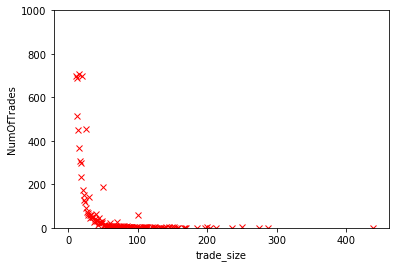

In [21]:
NumOfTrades=0
NumOfTrades= data.groupby('trade_size')
NumOfTrades=NumOfTrades.apply(lambda x: x['trade_size'].count())
plt.plot(NumOfTrades,'rx')
plt.xlabel('trade_size')
plt.ylabel('NumOfTrades')
plt.ylim((0,1000)) 
plt.show()



In [14]:
Perc=[10,25,50,60,70,80,90,95,99,99.5,99.9]
Perc_All=np.percentile(data['trade_size'], Perc) 
Perc_Hitting=np.percentile(data['Hitting'], Perc) 
Perc_Lifting=np.percentile(data['Lifting'], Perc) 
Perc_DF=pd.DataFrame(index=Perc)
Perc_DF['All']=Perc_All
Perc_DF['Hitting']=Perc_Hitting
Perc_DF['Lifting']=Perc_Lifting
Perc_DF


,All,Hitting,Lifting
10.0,1.0,0.0,0.0
25.0,1.0,0.0,0.0
50.0,1.0,0.0,0.0
60.0,1.0,1.0,1.0
70.0,2.0,1.0,1.0
80.0,2.0,1.0,1.0
90.0,4.0,2.0,2.0
95.0,5.0,4.0,4.0
99.0,16.0,9.0,10.0
99.5,24.0,14.0,15.0


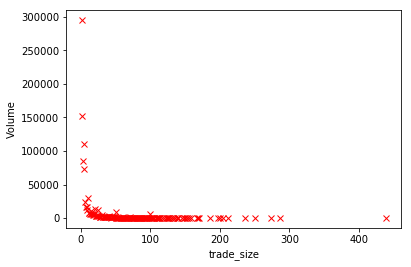

In [22]:
Volume=0
Volume=data.groupby('trade_size')
Volume=Volume.apply(lambda x: x['trade_size'].sum())
plt.plot(Volume,'rx')
plt.xlabel('trade_size')
plt.ylabel('Volume')
#plt.ylim((0,50000)) 
plt.show()


In [27]:
All=0
All=data.groupby('trade_size')
All=All.apply(lambda x: x['trade_size'].sum())

All


trade_size
1.0      294737.0
2.0      151934.0
3.0       84438.0
4.0       73636.0
5.0      110345.0
6.0       23718.0
7.0       17066.0
8.0       16160.0
9.0       12429.0
10.0      29580.0
11.0       7667.0
12.0       8268.0
13.0       6682.0
14.0       6300.0
15.0      10590.0
16.0       5856.0
17.0       5202.0
18.0       5364.0
19.0       4427.0
20.0      13940.0
21.0       3633.0
22.0       3344.0
23.0       2944.0
24.0       2832.0
25.0      11400.0
26.0       2366.0
27.0       1944.0
28.0       1932.0
29.0       1682.0
30.0       4320.0
           ...   
125.0       375.0
126.0       126.0
127.0       127.0
129.0       129.0
132.0       132.0
133.0       133.0
136.0       136.0
138.0       138.0
139.0       139.0
140.0       280.0
145.0       290.0
148.0       148.0
150.0       450.0
152.0       304.0
153.0       153.0
156.0       156.0
158.0       158.0
167.0       167.0
168.0       168.0
170.0       170.0
185.0       185.0
197.0       197.0
200.0       800.0
204.0       204.0

In [39]:
Perc_DF=pd.DataFrame(data=All, columns=['volume'])
Perc_DF['% volume']= Perc_DF.volume/Perc_DF.volume.sum()
Perc_DF['cumulative % volume']=Perc_DF['% volume'].cumsum()
Perc_DF


,volume,% volume,cumulative % volume
trade_size,,,
1.0,294737.0,0.294511,0.294511
2.0,151934.0,0.151817,0.446328
3.0,84438.0,0.084373,0.530701
4.0,73636.0,0.073579,0.604281
5.0,110345.0,0.110260,0.714541
6.0,23718.0,0.023700,0.738241
7.0,17066.0,0.017053,0.755294
8.0,16160.0,0.016148,0.771442
9.0,12429.0,0.012419,0.783861


In [23]:
Perc_All_Vol=0
Perc_All_Vol=data.groupby('trade_size')
Perc_All_Vol=Perc_All_Vol.apply(lambda x: x['trade_size'].sum())

Perc_Hitting_Vol=0
Perc_Hitting_Vol=data.groupby('Hitting')
Perc_Hitting_Vol=Perc_Hitting_Vol.apply(lambda x: x['Hitting'].sum())

Perc_Lifting_Vol=0
Perc_Lifting_Vol=data.groupby('Lifting')
Perc_Lifting_Vol=Perc_Lifting_Vol.apply(lambda x: x['Lifting'].sum())



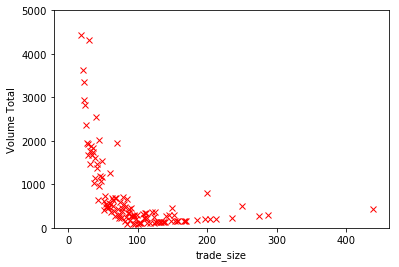

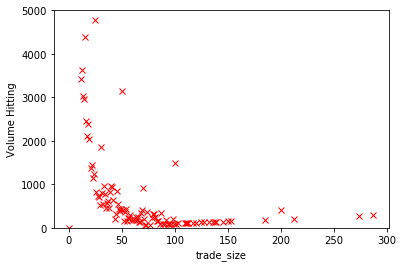

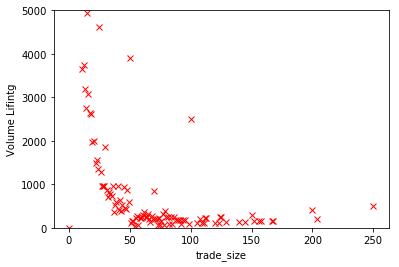

In [17]:
plt.plot(Perc_All_Vol,'rx')
plt.xlabel('trade_size')
plt.ylabel('Volume Total')
plt.ylim((0,5000)) 
plt.show()

plt.plot(Perc_Hitting_Vol,'rx')
plt.xlabel('trade_size')
plt.ylabel('Volume Hitting')
plt.ylim((0,5000)) 
plt.show()

plt.plot(Perc_Lifting_Vol,'rx')
plt.xlabel('trade_size')
plt.ylabel('Volume Lifintg')
plt.ylim((0,5000)) 
plt.show()

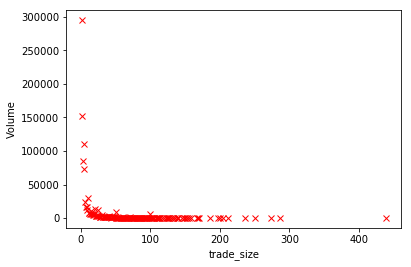